<a href="https://colab.research.google.com/github/AshwiniR97/ECE6258/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json 
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
from random import shuffle

In [ ]:
# Change directories here
mainDir = "/content/drive/My Drive/pokeData/Final Project Combined"

# Which folder to test
folder = "cropped_data"

# No Data Augmentation vs Data Augmentation
typeO = "newTraining"

# for getting the best weight file
filepath=os.path.join(mainDir, folder, typeO, "weights.best.h5")
modelPath = os.path.join(mainDir, folder, typeO, "model.json")
weightFile = os.path.join(mainDir, folder, typeO, "weights.h5")

In [ ]:
DATADIR_test = os.path.join(mainDir, folder, "testing")

# Change from training to newTraining and vice versa
DATADIR_train = os.path.join(mainDir, folder, typeO)
CATEGORIES_train = ["pikachu", "bulbasaur", "squirtle", "charmander", "meowth"]
CATEGORIES_test = ["pikachu", "bulbasaur", "squirtle", "charmander", "meowth"]
IMG_SIZE = 224

In [ ]:
testing_data = []

def create_testing_data():
  """
  Function reads through all the available images in each Pokemon directory,
  resizes according to requirement and appends to testing_data along with the class number.
  """
  for category in CATEGORIES_test:
    path = os.path.join(DATADIR_test, category)
    class_num = CATEGORIES_test.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        testing_data.append([new_array, class_num])
      except Exception as e:
        pass

create_testing_data()

In [ ]:
test_values = []
test_label = []
shuffle(testing_data)

In [ ]:
# Splitting the image data and the label to two separate lists.
for features, label in testing_data:
  test_values.append(features)
  test_label.append(label)

In [ ]:
test_values = np.array(test_values).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
test_label = np.array(test_label)

In [ ]:
# Loading the stored model weights and shit
json_file = open(modelPath, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Loading weights into new model
# Weights file contains last trained weights, whereas weights.best contains the best fit
loaded_model.load_weights(filepath)
print("Loaded model and weights from disk")

Loaded model and weights from disk


In [ ]:
# Compiling the loaded model with the same optimizer and loss functions
loaded_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Evaluating test accuracy based on model prediction and actual label
test_loss, test_acc =  loaded_model.evaluate(test_values, test_label)
print('Test Accuracy: ', test_acc)

2/2 [==============================] - 0s 98ms/step - loss: 1.0164 - accuracy: 0.9091
Test Accuracy:  0.9090909361839294


In [ ]:
predictions = loaded_model.predict(test_values)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  """
  Function to plot the test images and their subsequent accuracies.
  """
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[:,:,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  # If prediction is the same as the true class, label is different
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  # The probability percentage is included in the plot
  plt.xlabel("{} {}% ({})".format(CATEGORIES_test[predicted_label],
                                       round(100*np.max(predictions_array), 2),
                                       CATEGORIES_test[true_label]),
             color=color)

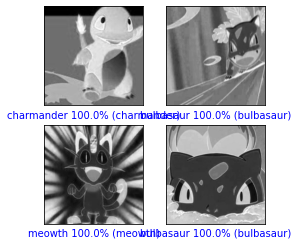

In [ ]:
# Adjust the num_rows and num_cols variable according to desired number of 
# pictures to be plotted
num_rows = 2
num_cols = 2
num_images = num_cols*num_rows
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions, test_label, test_values)
plt.savefig('output_1.png')